In [40]:
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import numpy as np
import html5lib
import requests
from openpyxl import Workbook
from datetime import datetime
import webbrowser
import os

In [41]:
path = '../Master_tables_MFIC_Investment.xlsx'
xls = pd.ExcelFile(path)
all_sheets = pd.read_excel(path, keep_default_na=False, na_values=[
                           '_'], sheet_name=None)

In [42]:
dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df
    print(f"DataFrame name: {sheet_name} : {sheet_df.shape}")

DataFrame name: September 30 2023 : (983, 45)
DataFrame name: June 30 2023 : (1043, 45)
DataFrame name: March 31 2023 : (986, 45)
DataFrame name: December 31 2022 : (890, 45)
DataFrame name: September 30 2022 : (950, 45)
DataFrame name: June 30 2022 : (961, 50)
DataFrame name: March 31 2022 : (915, 50)
DataFrame name: December 31 2021 : (935, 50)
DataFrame name: September 30 2021 : (982, 50)
DataFrame name: June 30 2021 : (1050, 50)
DataFrame name: March 31 2021 : (1006, 50)
DataFrame name: December 31 2020 : (1023, 50)
DataFrame name: September 30 2020 : (1059, 50)
DataFrame name: June 30 2020 : (1109, 50)
DataFrame name: March 31 2020 : (1114, 50)
DataFrame name: December 31 2019 : (872, 27)
DataFrame name: September 30 2019 : (639, 21)
DataFrame name: June 30 2019 : (582, 21)
DataFrame name: March 31 2019 : (492, 21)
DataFrame name: December 31 2018 : (422, 21)
DataFrame name: September 30 2018 : (403, 26)
DataFrame name: June 30 2018 : (369, 21)
DataFrame name: March 31 2018 : (367

In [43]:
for dataframe in dataframes:
    # print(dataframe, ':',
    #       dataframes[dataframe].loc[dataframes[dataframe].shape[0]-1][0])
    if dataframes[dataframe].shape[0]-1 < 250:
        print(
            dataframe, ':', dataframes[dataframe].shape[0]-1)

March_31_2017 : 249
September_30_2015 : 245
June_30_2015 : 245
March_31_2013 : 184
June_30_2013 : 228


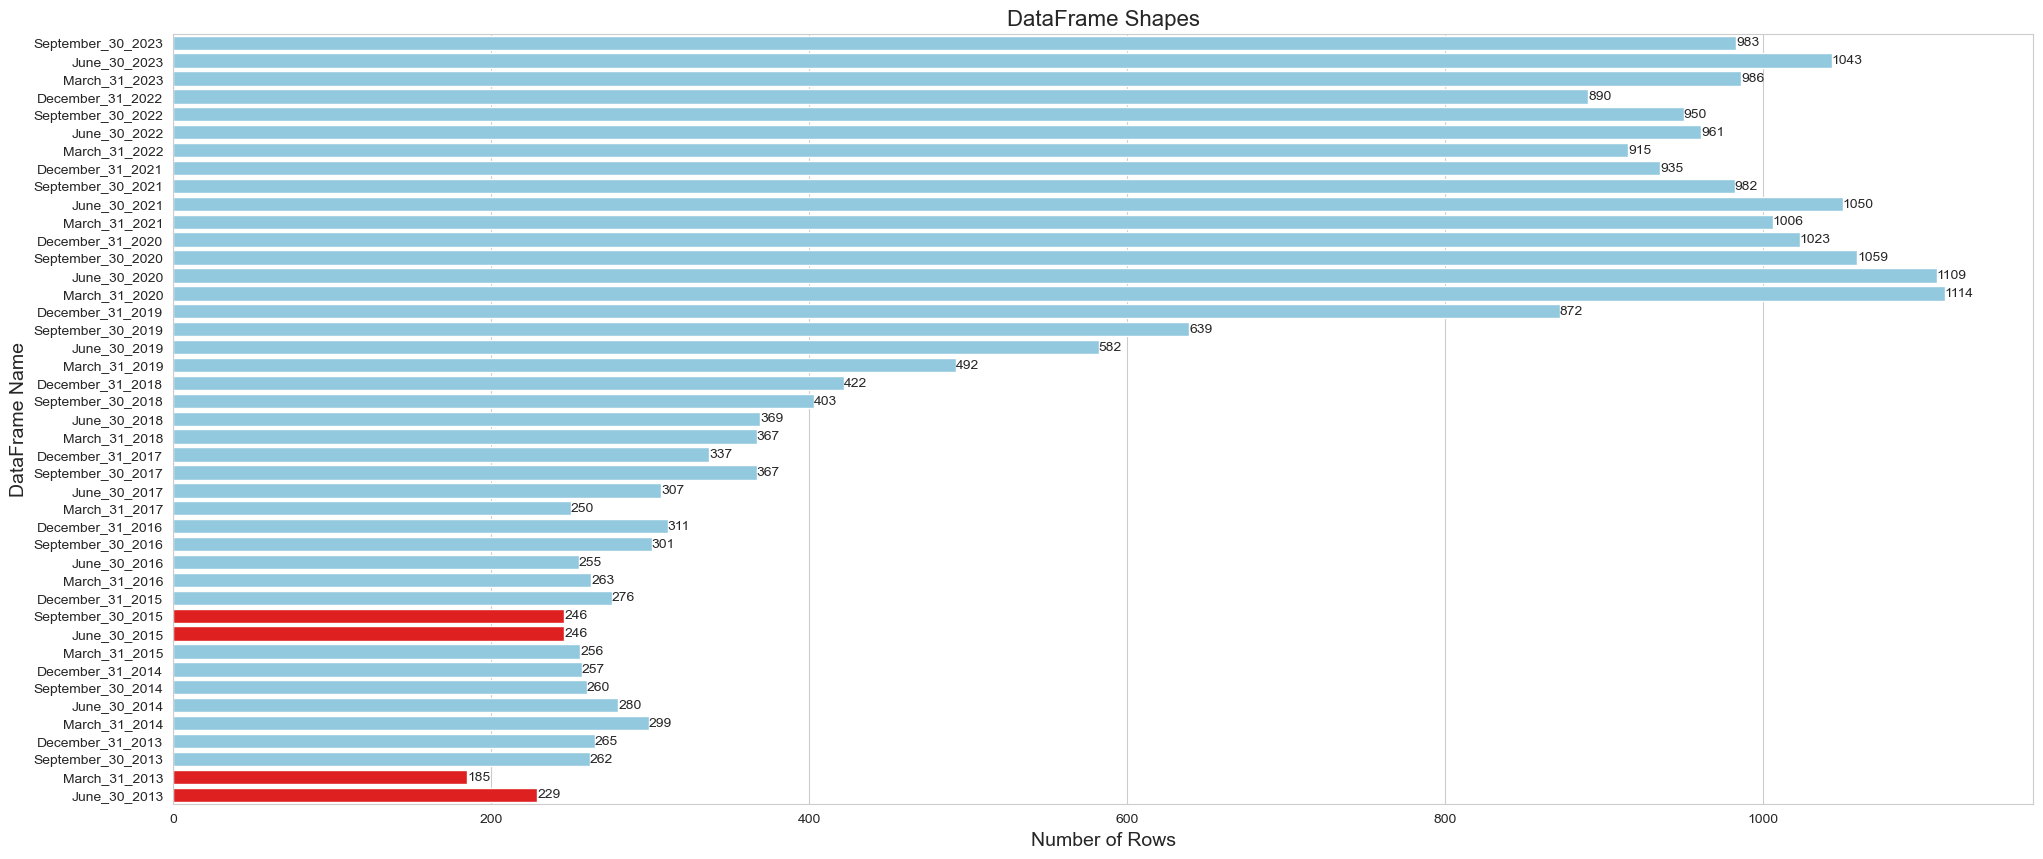

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df

# Extract DataFrame names and shapes
df_names = []
df_shapes = []
for sheet_name, sheet_df in dataframes.items():
    df_names.append(sheet_name)
    df_shapes.append(sheet_df.shape)

# Create a bar graph with Seaborn
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")

# Create a Seaborn barplot
sns.barplot(x=[shape[0] for shape in df_shapes], y=df_names, palette=[
    'red' if shape[0] < 250 else 'skyblue' for shape in df_shapes])

# Customize the appearance of bars
for i, shape in enumerate(df_shapes):
    width = shape[0]
    plt.text(width, i, f'{int(width)}', ha='left', va='center')

# Adjust font size
plt.xlabel('Number of Rows', fontsize=14)
plt.ylabel('DataFrame Name', fontsize=14)
plt.title('DataFrame Shapes', fontsize=16)

plt.show()

In [45]:
def process_table_fun(soi_table_df, process_tables_shapes):
    print(1, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace(r'^\s*\$\s*$', np.nan, regex=True)
    print(2, 'shape:', soi_table_df.shape)
    # fewer non-null values, effectively dropping rows with more than 100 non-null values.
    for index, row in soi_table_df.iterrows():
        if row.count() > 100:
            soi_table_df = soi_table_df.drop(index)
    print(0, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=1)
    print(3, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=0)
    print(4, 'shape:', soi_table_df.shape)
    soi_table_df.dropna()
    print(5, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.rename(
        columns=soi_table_df.iloc[0]).drop(soi_table_df.index[0])
    print(6, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace('—', 0, regex=False)
    print(7, 'shape:', soi_table_df.shape)
    process_tables_shapes.append(soi_table_df.shape)
    return soi_table_df


# df = dataframes['June_30_2021']
# process_table = process_table_fun(df)
# process_table.to_csv("process_table.csv")
# process_table

In [46]:
# for _ in range(len(process_table.columns)):
#     print(process_table.iloc[:, _].unique())

In [47]:
process_tables = {}
process_tables_shape = []
for dataframe in dataframes:
    print(dataframe)
    process_tables[dataframe] = process_table_fun(
        dataframes[dataframe], process_tables_shape)
    print('\n')

September_30_2023
1 shape: (983, 45)
2 shape: (983, 45)
0 shape: (983, 45)
3 shape: (983, 45)
4 shape: (983, 45)
5 shape: (983, 45)
6 shape: (982, 45)
7 shape: (982, 45)


June_30_2023
1 shape: (1043, 45)
2 shape: (1043, 45)
0 shape: (1043, 45)
3 shape: (1043, 45)
4 shape: (1043, 45)
5 shape: (1043, 45)
6 shape: (1042, 45)
7 shape: (1042, 45)


March_31_2023
1 shape: (986, 45)
2 shape: (986, 45)
0 shape: (986, 45)
3 shape: (986, 45)
4 shape: (986, 45)
5 shape: (986, 45)
6 shape: (985, 45)
7 shape: (985, 45)


December_31_2022
1 shape: (890, 45)
2 shape: (890, 45)
0 shape: (890, 45)
3 shape: (890, 45)
4 shape: (890, 45)
5 shape: (890, 45)
6 shape: (889, 45)
7 shape: (889, 45)


September_30_2022
1 shape: (950, 45)
2 shape: (950, 45)
0 shape: (950, 45)
3 shape: (950, 45)
4 shape: (950, 45)
5 shape: (950, 45)
6 shape: (949, 45)
7 shape: (949, 45)


June_30_2022
1 shape: (961, 50)
2 shape: (961, 50)
0 shape: (961, 50)
3 shape: (961, 50)
4 shape: (961, 50)
5 shape: (961, 50)
6 shape: (960, 

In [48]:
df = (process_tables['September_30_2015'])
df = dataframes['September_30_2015']
df.to_csv('test.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       246 non-null    object
 1   1       246 non-null    object
 2   2       246 non-null    object
 3   3       246 non-null    object
 4   4       246 non-null    object
 5   5       246 non-null    object
 6   6       246 non-null    object
 7   7       246 non-null    object
 8   8       246 non-null    object
 9   9       246 non-null    object
 10  10      246 non-null    object
 11  11      246 non-null    object
 12  12      246 non-null    object
 13  13      246 non-null    object
 14  14      246 non-null    object
 15  15      246 non-null    object
 16  16      246 non-null    object
 17  17      246 non-null    object
 18  18      246 non-null    object
dtypes: object(19)
memory usage: 36.6+ KB


In [50]:
# for _ in range(len(df.columns)):
#     print('')
#     print(df.iloc[:, _].unique())

In [51]:
x = [1, 2, 2, 34, 23, 23, 4, 45, 24, 3, 34, 3]
y = [2, 2, 3, 34, 21, 44, 5, 65, 34, 3, 23, 4]

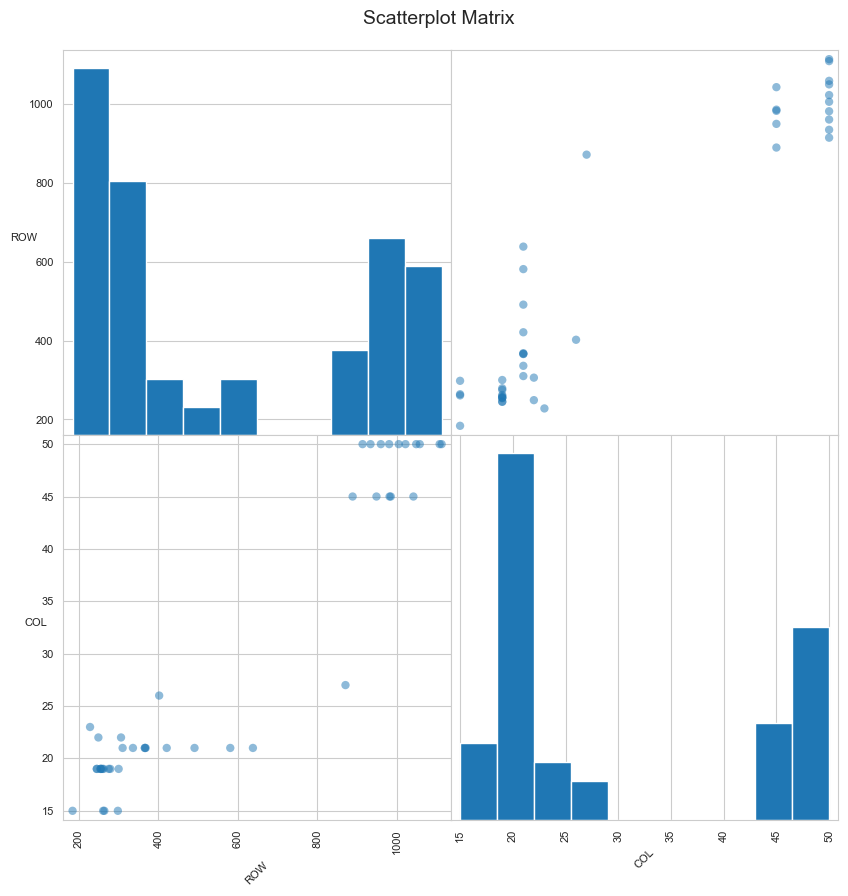

In [52]:
data = pd.DataFrame(process_tables_shape, columns=["ROW", "COL"])
scatter_matrix = pd.plotting.scatter_matrix(
    data, alpha=0.5, figsize=(10, 10), diagonal='hist', marker='o')

# Add labels to the subplots
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=0)

plt.suptitle('Scatterplot Matrix', y=0.92, fontsize=14)

plt.show()

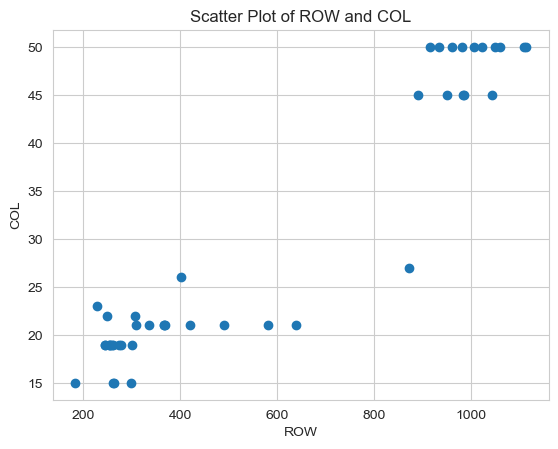

In [53]:
x = [point[0] for point in process_tables_shape]
y = [point[1] for point in process_tables_shape]

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('ROW')
plt.ylabel('COL')
plt.title('Scatter Plot of ROW and COL')

# Show the plot
plt.show()

In [54]:
dataframes['December_31_2013'].to_csv('test.csv')

In [55]:
dataframes['December_31_2013']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,INVESTMENTS IN NON-CONTROLLED/NON-AFFILIATED I...,,Industry,,Par Amount*,,Cost,,Fair Value (1),,,,,,
1,CORPORATE DEBT0127.9,,,,,,,,,,,,,,
2,SECURED DEBT074.3,,,,,,,,,,,,,,
3,1st Lien Secured Debt035.6,,,,,,,,,,,,,,
4,"Archroma, L+825, 10/1/18 ‡",,Chemicals,,,35511,,,,34819,,,,35422,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Broadcasting & Entertainment,0.3,,,,,,,,,,,,,
261,Aerospace and Defense,0.3,,,,,,,,,,,,,
262,Grocery,0.2,,,,,,,,,,,,,
263,Electronics,0.2,,,,,,,,,,,,,
